In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
np.random.seed(42)

# Generate features
cgpa = np.round(np.random.uniform(5.0, 10.0, 100), 2)
iq = np.random.randint(90, 160, 100)

# Generate target based on a simple rule with noise
placement_score = 0.4 * cgpa + 0.03 * iq + np.random.normal(0, 1, 100)
placement = [1 if score > 7.5 else 0 for score in placement_score]

# Create DataFrame
df = pd.DataFrame({
    'cgpa': cgpa,
    'iq': iq,
    'placement': placement
})

df.head()

,cgpa,iq,placement
0,6.87,152,0
1,9.75,141,1
2,8.66,93,1
3,7.99,112,0
4,5.78,104,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    int32  
 2   placement  100 non-null    int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 2.1 KB


In [4]:
import matplotlib.pyplot as plt

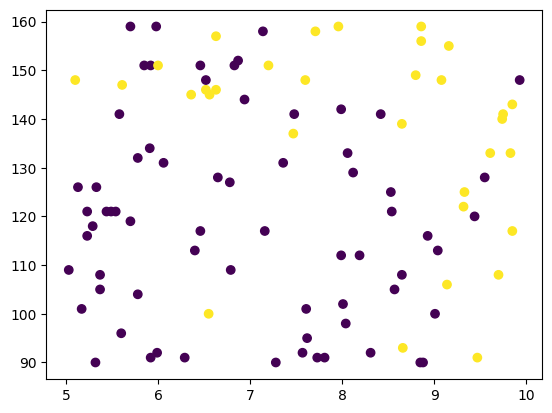

In [5]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [6]:
X = df.iloc[:, 0:2]
Y = df.iloc[:, -1]

In [7]:
X,Y


(    cgpa   iq
 0   6.87  152
 1   9.75  141
 2   8.66   93
 3   7.99  112
 4   5.78  104
 ..   ...  ...
 95  7.47  137
 96  7.61  101
 97  7.14  158
 98  5.13  126
 99  5.54  121
 
 [100 rows x 2 columns],
 0     0
 1     1
 2     1
 3     0
 4     0
      ..
 95    1
 96    0
 97    0
 98    0
 99    0
 Name: placement, Length: 100, dtype: int64)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

In [10]:
X_train

,cgpa,iq
70,8.86,159
52,9.70,108
65,7.71,158
49,5.92,91
93,7.81,91
...,...,...
60,6.94,144
15,5.92,151
0,6.87,152
88,9.44,120


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[ 0.9856222 ,  1.52814824],
       [ 1.55037162, -0.76707441],
       [ 0.21245335,  1.48314387],
       [-0.99100077, -1.53214863],
       [ 0.27968543, -1.53214863],
       [-0.13043022,  1.16811331],
       [ 0.44776561,  0.35803473],
       [-1.54230377,  1.03310022],
       [ 1.44952351,  0.1330129 ],
       [ 0.15194449, -1.35213116],
       [ 0.05109638,  0.53805219],
       [-1.41456283, -0.31703075],
       [ 0.41414957, -1.0371006 ],
       [-1.2061434 , -1.3071268 ],
       [ 1.70500539,  1.03310022],
       [ 1.39573785, -1.53214863],
       [ 0.76375636, -0.00200019],
       [-0.50020663,  0.1330129 ],
       [-1.28009868, -0.18201766],
       [ 1.30161295, -0.00200019],
       [-1.52213415,  0.04300417],
       [-0.58760832,  0.94309148],
       [-1.58936622, -0.72207004],
       [ 0.97889899, -1.57715299],
       [ 0.4343192 , -1.21711807],
       [-1.21958982,  0.71806966],
       [ 1.18731842,  1.34813078],
       [-1.39439321, -1.57715299],
       [ 1.08647031,

In [15]:
X_test = scaler.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf =LogisticRegression()

In [18]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [19]:
Y_pred =clf.predict(X_test)

In [20]:
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(Y_test, Y_pred)

0.9

In [23]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

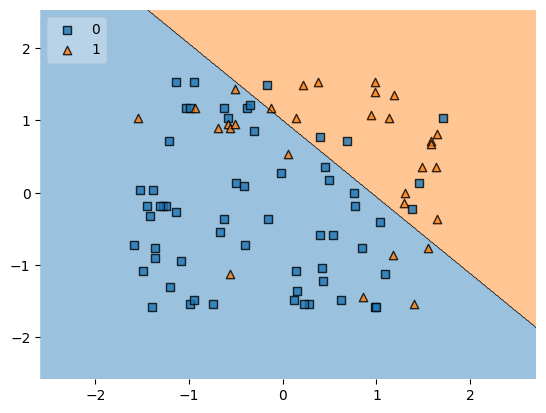

In [24]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)